<a href="https://colab.research.google.com/github/kankeinai/Computational_physics/blob/main/Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PHYS270 Assignment 7: Interpolation
Student name: Begantsova Milana

##Abstract
In this programming assignment, we will study the concept of interpolation. This is a method of finding unknown intermediate values of a function based on a set of discrete values. We will interpolate set of discrete values with linear and cubic spline interpolation to approximate values of f. And then we will decide based on visual comparison and root mean square deviation error (rms) what approach maximizes accuracy of our approximation. The results of this work are the graphs of interpolated functions with corresponding rms errors. According to these results, the best choice for our function is a cubic interpolation of $ln(y)$ that has rms error of $6\cdot 10^{-4}$.

##Introduction
The interpolation is a method of determining intermediate values of some function $f$ between some set of known discrete values. The interpolation can be polinomial and spline. The goal of a polinomial interpolation is to find such polinomial that will go through every point with the lowest possible degree. While a spline interpolation has opposite approach is some sense. In spline interpolation we took pairs of points and try to choose an individual polinomial at each range. In short we generate splines between those points. 

In this programming assignment, we will study spline interpolation, namely linear and cubic. The only difference between those is the order of polinomial and requirements for the splines. Linear spline interpolation asserts that all data points should be connected, while cubic interpolation requires that our function should be continius and differentiable two times (has first and second derivative). Usually cubic interpolation has more application that linear one as in physics and other science we usually are interested in finding derivative. In kinematics, first derivative of displacement is velosity, second derivative is acceleration.

At the beginning of the experiment, I will study our set of discrete values and their behaviour on a graph. Then I will construct class of linear interpolation and cubic interpolation to approximate values of f. Then based on our discrete values, I will try to decrease the error of interpolation by trying interpolation not our function, but $ln(f)$ and see how this can influence our results. 

##Methods
In this experiment, our goal is to interpolate function $f$ with minimum possible root mean square error:
$$f(x) = e^{-15x^2}$$
For the interpolation, I have decided to use spline interpolation, not the polinomial interpolation. Polinomial interpolation of high order can overfit our function. The problem with polinomial interpolation is that we should choose an optimum degree of polinomial so that the function go through all data points. But it could be impossible task with low order and we may end up with oscilating between our data points function with high rms error. But instead we can choose optimum polinomial at each range of values $x$ and even this function can be continius with cubic spline interpolation. This method is optimum if we have a small data set and not that difficult function. In our experiment to interpolate the function we can operate with values of $f$ at $$X\in\{1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1.0\}$$
So, we should only generate 8 splines between those data points.
As I have already said, I will use linear and cubic interpolation. The linear interplation generates splines (straiht lines) between pair of data points by following formula:
$$S(x)=f(x_i)+(x-x_i)\frac{f(x_{i+1})-f(x_{i})}{x_{i+1}-x_i}$$
Mathematically, we just calculate the gradient between pair of values and draw a straight line at $[x_i, x_{i+1}]$ where $x_i$ is an element of set $X$. $S(x)$ is our spline at $[x_i, x_{i+1}]$. We should store somehow those splines (formulas for them) at pairvise partitions of $X$ and use them later to approximate our uknown intermediate values of function $f$. I think that linear interpolation compared with cubic interpolation will have much greater rms error as our function $f$ is not linear, but exponential. The error achieved with linear interpolation should become our upper bound.
The requirements of linear interpolation: 
1. $S_i(x_i)=f(x_i)$
2. $S_{i+1}(x_i)=S(x_i)$ – all points should be connected

The cubic interpolation uses similar approach but its splines not straight lines, but polinomials of third order. It has much more requirements for those splines:
1. $S_i(x_i)=f(x_i)$
2. $S_{i+1}(x_i)=S_i(x_i)$
3. $S'_{i+1}(x_i)=S'_i(x_i)$
4. $S''_{i+1}(x_i)=S''_i(x_i)$

So, our function should not only connect our points but also be twise differentiable. In order to express our splines at each partition we should solve a system of linear equations that I will describe in the "Description" section. 

To judge the accuracy of our splines, I will use a graphical and error estimation methods. I will use matplotlib library to draw our functions approximated with linear and cubic interpolation and see how they incline from the real values. Then I will conclude based on rms error the accuracy of our interpolation. For error estimation, I have decided to use rms deviation formula since we work with approximated continius values. We know the real values of function at defined range, so we can judge at what values our approximation deviate from $f$ at average. 
$$rms=\sqrt{\frac{1}{n}\sum^n_{i=0}(y-f(x_i))^2}$$

Both linear and cubic interpolation will be written as classes. But I will also include the result of python library function at the end.

##Description
In this programming assigment, we will only use library numpy for compuation and matplotlib for visualizations. 

In [ ]:
#include all neccessary libraries
import numpy as np
import matplotlib.pyplot as plt

Suppose, we have some set of values $X=\{1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1.0\}$ and we know that at this values of $X$, the values of our function are calculated as $g(x) = e^{-15x^2}$.

In [ ]:
#create a set of values X and calculate g(x) at this points
X=np.linspace(-1, 1., 9, dtype=np.float128)
g = np.exp(-15*X**2)

We would like to know the intermediate values of our function at all $x\in[-1,1]$. We have an assumption that at all these points our function behaves like $g(x)$.

In [ ]:
#create a set of values that we should approximate and "ideal" values of our function
x_range = np.linspace(-1, 1., 1000, dtype=np.float128)
real_g = np.exp(-15*x_range**2)

In this programming assigment we will draw a plot of function multiple times, so we need a function that will be able to draw all needed plots at the same time and be universal:

In [ ]:
#data is a dictionary that stores the y-data, titles and colors of our graphs
def graph(data):
  
  fig, ax = plt.subplots(figsize=(20,10))
  
  #settings of our graph
  ax.set_title("Values of g(x)", fontsize=20)
  ax.set_xlabel('x',  fontsize=15)
  ax.spines['left'].set_position('center')
  ax.yaxis.set_ticks_position('left')
  
  #plot our discrete values and functions
  ax.scatter(X, g, label = "Discrete values of g(x)", color="r")
  for y, title, color in zip(data['y'], data['title'], data['color']):
    ax.plot(x_range, y, label = title, c=color,  linestyle = '--')
  
  plt.grid()
  ax.legend()
  plt.show()

At first, I would like to draw our discrete values (red markers) for which we know values of $f$ and ideal values for our function $g(x)$:

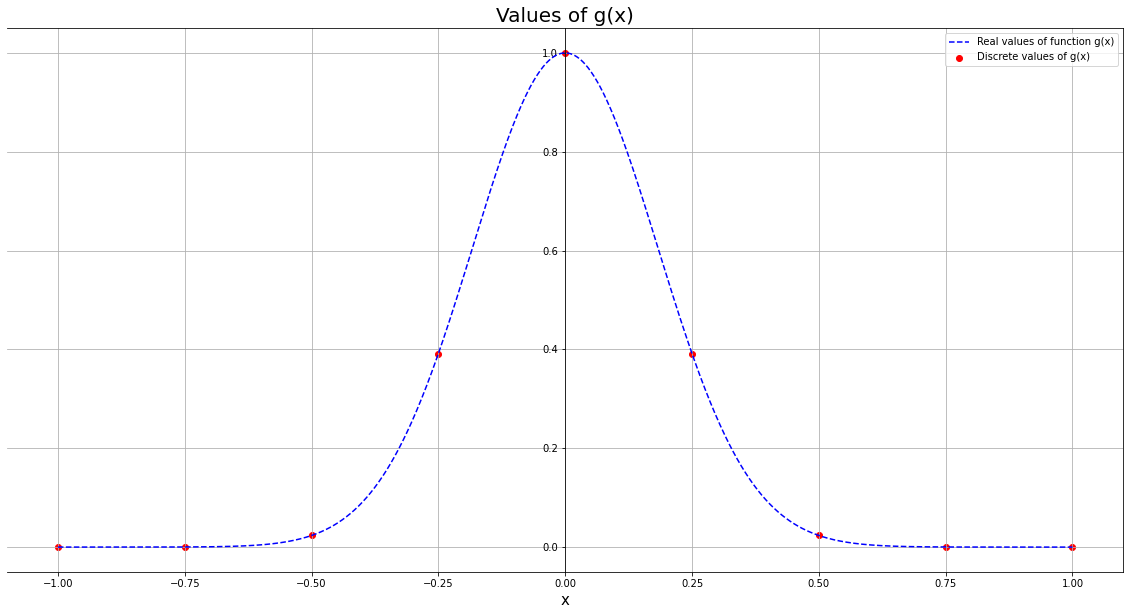

In [ ]:
data={'y':[real_g],'title':["Real values of function g(x)"],'color':["b"]}
graph(data)
#Graph 1



> So, we see that the graph is non-linear, symetrical relatively to y-axis, non-negative. It has an extremum point at $x=0$ and zero gradients as $x$ approaches left and right boundaries.



In [ ]:
#the function to calculate rms error
def rms_error(y, g):
  return np.sqrt(np.mean((y-g)**2))

###Linear interpolation
At first I will create a class linear interpolation that will generate linear splines between partitions of $X$ according to formula from "Methods" sections. 

In [ ]:
class LinearInterpolation(object):

  #at first we create an instance of a class to which we pass know dicrete values for x, g
  def __init__(self, X, g):
    self.__X = X
    self.__g = g
    self.__some_dict = self.__interpol()
  
  def get_dict(self):
    return self.__some_dict
  
  #we pass to compute_function the values of some pair [x_i, x_i+1] and corresponding g values
  #the function returns us a lambda function of a linear spline between those two points and those two points
  @staticmethod
  def __compute_function(X_1, X_2, g_1, g_2):
    coef = (g_2-g_1)/(X_2-X_1)
    function = lambda x: (g_1-X_1*coef) + x*coef
    return np.array([X_1, X_2]), function

  #we pair by pair go through values of set X and store our functions for splines
  #calculated with compute_function to dictionary "some_dict"
  def __interpol(self):
    some_dict = {'sub_x':[], 'func':[]}
    for i in range(len(self.__X)-1):
      x, y = self.__compute_function(self.__X[i],self.__X[i+1], self.__g[i], self.__g[i+1])
      some_dict['sub_x'].append(x)
      some_dict['func'].append(y)
    return some_dict
  
  def predict(self, x_range):
    #when we call function predict() with instance of our class
    #it cals function interpol() that returns dict with formulas for each spline
    #and ranges for x. If we want to approximate f(x),
    #we just should find  x\in[x_i,x_i+1] and return value of spline function at x
    y = []
    for item in x_range:
      for x, fun in zip(self.__some_dict['sub_x'], self.__some_dict['func']):
        if(x[0]<=item and x[1]>=item):
          y.append(fun(item))
          break
    return np.array(y)
  
  

We should now just create an instance of a class LinearInterpolation and use method predict(x_range), where x_range are intermediate values of $x\in[-1,1]$. 

In [ ]:
#now y_range stores the prediction of linear interpolation with X, g values
y_range = LinearInterpolation(X, g).predict(x_range)
y_range_err = rms_error(y_range, real_g)


In [ ]:
print("The error of linear interpolation with X, g:", y_range_err)

The error of linear interpolation with X, g: 0.047584441087406821767


But what if we try to generate splines for $ln(g)$ and then will find an exponent of our prediction:
$$ln(g(x))=-15x^2$$
At first sight, for linear or cubic interpolation it should be much easier to interpolate polinomial of second order rather than exponential function. Lets try out our assumption:

In [ ]:
#now y_range stores the prediction of linear interpolation with X, ln|(g) values
y_range_log = np.exp(LinearInterpolation(X, np.log(g)).predict(x_range))
y_range_log_err = rms_error(y_range_log, real_g)

In [ ]:
print("The error of linear interpolation with X, ln(g):",y_range_log_err)

The error of linear interpolation with X, ln(g): 0.062227033429192568603


It seems that our assumption for Linear interpolation is not correct since error increased in $\approx1.3$ times, but to judge more accurately we need some visualization:

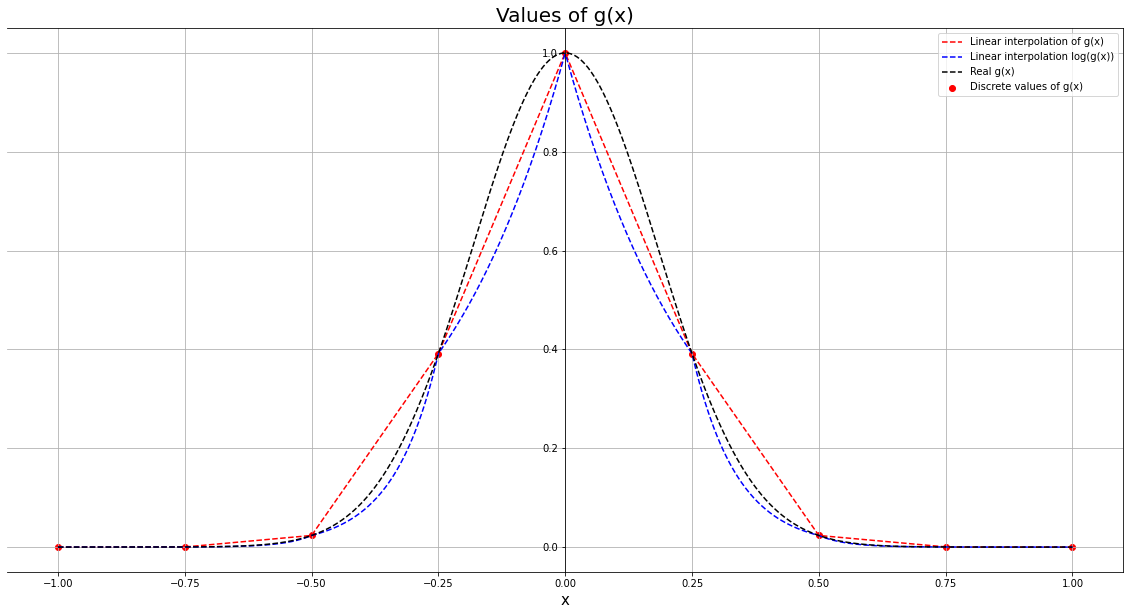

In [ ]:
data = {'y':[y_range, y_range_log, real_g], 
        'title':["Linear interpolation of g(x)", "Linear interpolation log(g(x))", "Real g(x)"],
        'color':['r', 'b', 'k']
        }
graph(data)
#Graph 2 

The real values of $g(x)$ are black colored. We see that ordinary linear interpolation on average has less deviation from real values of g(x). But Linear interpolation that used $X, ln(g)$ to generate splines almost accurately generated splines closer to boundaries. However as values go to extremum of function the inclonation increased rapidly. The graph confirmed my assumptions that Linear Interpolation will fail to approximate the function g as it is linear.


> Note: If we could choose greater number of points, we would achief less error. As the number of point goes to infinity, the error will approach zero. The function still will not be continious.





###Cubic Interpolation
At the moment the best rms deviation error that we could achief is $\approx0.042$. The problem with this method is that our function is not linear, so we should use splines of greater degree. My assumption is that cubic interpolation with $X, ln(g)$ will demonstrate the least possible error among used methods, as it will generate non-linear, continius function that will capture the function's behaviour.

In cubic interpolation, the splines are polinomials of third order and we have four unknown coefficients:

$$S_i(x_i)=ax_i^3+bx^2_i+cx_i+d$$

Those splines should also follow defined conditions: \
1. $S_i(x_i)=f(x_i)$
2. $S_{i+1}(x_i)=S_i(x_i)$
3. $S'_{i+1}(x_i)=S'_i(x_i)$
4. $S''_{i+1}(x_i)=S''_i(x_i)$

So, we care not only about splines, but also about first and second derivatives:
$$S_i'(x_i)=3ax^2_i+2bx_i+c$$
$$S_i''(x_i)=6ax_i+2b$$

We can try to express our formula for spline $S_i(x_i)$ not in terms of coefficients, but in terms of values of second derivatives. After some mathematical manipulations [2], the formula for spline can be expressed as:
$$S_i(x_i)=\frac{(x_{i+1} - x)^3M_i+(x-x_{i})^3M_{i+1}}{6h_i}+(\frac{g_i}{h_i}-\frac{M_i h_i}{6})\cdot(x_{i+1}-x)+(\frac{g_{i+1}}{h_i}-\frac{M_{i+1} h_i}{6})\cdot(x-x_{i})$$
where $M_i=f''(x_i)=$ and $h_i=x_{i}-x_{i-1}$

Now, our goal is to calculate unknown second derivatives (the array $M$) at each cubic spline, so that we can approximate our interpolate functions. 

Lets assume that,
$S''(x_0)=S''(x_n)=0$ and
$$\mu_i=\frac{h_i}{h_{i+1}+h_i}, \ \lambda_i=1-\mu_i$$

Then we can write next system of linear equations [2] to find values for $M$:
$$A\times M=\begin{vmatrix}
1 & 0  &  &  &  \\
\mu_1 & 2 & \lambda_1 &  &  \\
 & \mu_2 & 2 & \lambda_2&  \\
 &  & \mu_3 & 2& \lambda_3 & ...\\
 & &... \\
  &  &  &\mu_{n-1} &2& \lambda_{n-1}\\
 &  &  & & 0& 1\\
\end{vmatrix}\times
\begin{vmatrix}
M_0\\
M_1\\
M_2\\
...\\
...\\
...\\
M_n\\
\end{vmatrix} = 
6\begin{vmatrix}
f''(x_0)\\
f[x_0, x_1, x_2]\\
f[x_1, x_2, x_3]\\
...\\
...\\
f[x_{n-2}, x_{n-1}, x_n]\\
f''(x_n)\\
\end{vmatrix}=d
$$
Where $f[x_{i-1}, x_i, x_{i+1}]$ can be calculated as:
$$6f[x_{i-1}, x_i, x_{i+1}]=\frac{6}{h_{i+1}+h_i}\left(\frac{y_{i+1}-y_{i}}{h_{i+1}}-\frac{y_{i}-y_{i-1}}{h_{i}}\right)$$
We can easily find solution to this system as:
$$M=A^{-1}d$$
And then substitute our values for $M$ to $S_i(x_i)$ formula and generate our cubic splines.

In [ ]:
class CubicInterpolation(object):

  #at first we create an instance of a class to which we pass know dicrete values for x, g
  def __init__(self, X, g):
    self.__X = X
    self.__g = g
    self.__some_dict = self.__interpol()
  
  def get_dict(self):
    return self.__some_dict

  #at first we generate our matrix A and array d
  def __calc_matrix(self, X, g):
    A=2*np.identity(len(X)) 
    A[0,0]=1
    A[-1,-1]=1
    d = np.zeros(len(X))
    for i in range(len(X)-2):
      h_1=X[i+1]-X[i]
      h_2=X[i+2]-X[i+1]
      mu = h_1/(h_1+h_2)
      
      #calculate diagonals of A
      A[i,i+1] = mu
      A[i+1,i] = 1-mu
      
      #formula for 6f[x_i-1, x_i, x_i+1]
      d[i+1] = 6/(h_1+h_2)*((g[i+2]-g[i+1])/h_2-(g[i+1]-g[i])/h_1)
    
    #calculate array M with values of second derivatives
    return np.linalg.solve(A,d)
  
  #we pass to compute_function the values of some pair [x_i, x_i+1] and corresponding g, M values
  #the function returns us a lambda function of a cubic spline (according to formula) between those two points and those two points
  @staticmethod
  def __cubic_function(X_1, X_2, g_1, g_2, M_1, M_2):
    h = X_2 - X_1
    function = lambda x: ((X_2 - x)**3*M_1+(x-X_1)**3*M_2)/(6*h)+(g_1/h-M_1*h/6)*(X_2-x)+(g_2/h-M_2*h/6)*(x-X_1)
    return np.array([X_1, X_2]), function

  
  #we pair by pair go through values of set X and store our functions for splines
  #calculated with compute_function to dictionary "some_dict"
  def __interpol(self):
    M = self.__calc_matrix(self.__X, self.__g)
    some_dict = {'sub_x':[], 'func':[]}
    for i in range(len(X)-1):
      x, y = self.__cubic_function(self.__X[i], self.__X[i+1], self.__g[i], self.__g[i+1], M[i], M[i+1])
      some_dict['sub_x'].append(x)
      some_dict['func'].append(y)
    return some_dict

  def predict(self, x_range):
    #when we call function predict() with instance of our class
    #it cals function interpol() that returns dict with formulas for each spline
    #and ranges for x. If we want to approximate f(x),
    #we just should find  x\in[x_i,x_i+1] and return value of spline function at x
    y = []
    for item in x_range:
      for x, fun in zip(self.__some_dict['sub_x'], self.__some_dict['func']):
        if(x[0]<=item and x[1]>=item):
          y.append(fun(item))
          break
    return np.array(y)

We should now just create an instance of a class CubicInterpolation and use method predict(x_range), where x_range are intermediate values of  $x\in[-1,1]$. 

In [ ]:
#now the prediction of Cubic interpolation with X, g is stored in y_range_cubic
y_range_cubic = CubicInterpolation(X, g).predict(x_range)
y_range_cubic_err = rms_error(y_range_cubic, real_g)

In [ ]:
print("The error of cubic interpolation with X, ln(g):",y_range_cubic_err)

The error of cubic interpolation with X, ln(g): 0.006142755278411991209


Based on rms deviation error, cubic spline interpolation method demonsatrated accuracy that almost 10 times highier than linear interpolation method. Now, lets repeat the procedure with $X, ln(g)$

In [ ]:
y_range_cubic_log = np.exp(CubicInterpolation(X, np.log(g)).predict(x_range))
y_range_cubic_log_err = rms_error(y_range_cubic_log, real_g)

In [ ]:
print("The error of cubic interpolation with X, ln(g):",y_range_cubic_log_err)

The error of cubic interpolation with X, ln(g): 0.0006314424541017892411


The rms error demonstrated with cubic interpolation with $X, ln(g)$ confirmed my thoughts that it will be easier for cubic splines to capture the behaviour of polinomial of second order. So, cubic splines almost perfectly fitted the parabola and the it was raised to exponent. That is why the result is much better. It is time to see how well visually the splines interpolated our function $g(x)$

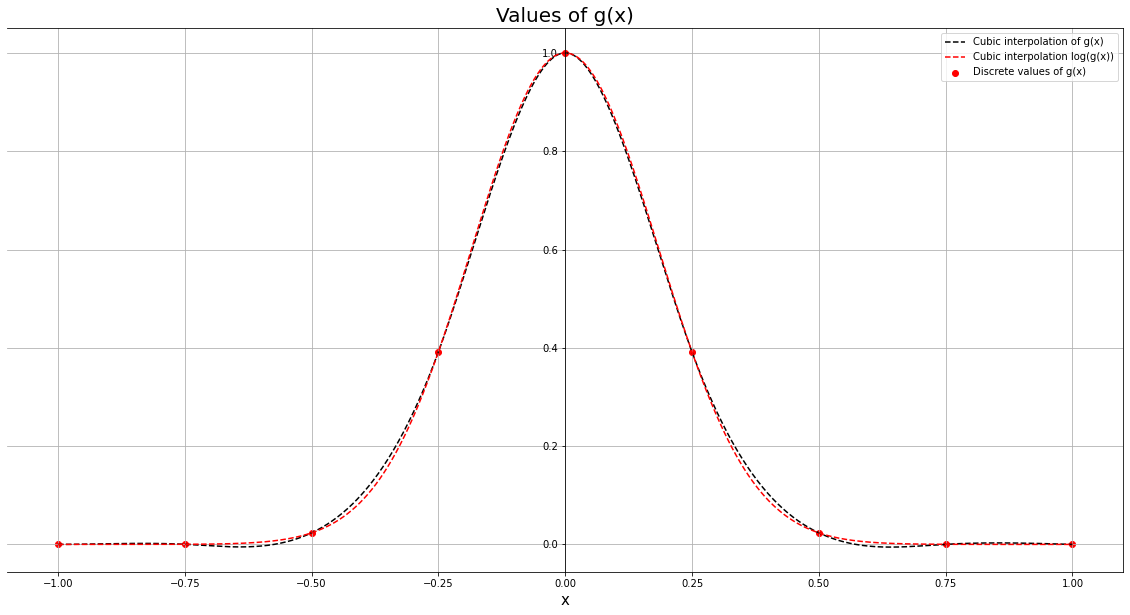

In [ ]:
data = {'y':[y_range_cubic, y_range_cubic_log], 
        'title':["Cubic interpolation of g(x)", "Cubic interpolation log(g(x))"],
        'color':['k', 'r']
        }
graph(data)
#Graph 3

As we can see at some points cubic interpolation of g(x) is slightly smaller than zero, but as I have noted at the beginning our function is non-negative. The same error is not repeated in interpolation with $X, ln(g)$ as after we raise exponent to value of our predicition which by defacto is positive. From all of the methods the most accurate one is cubic spline interpolation with $X, ln(g)$ as it demonstrated the smallest rms error and even visually merged with graph of real function.

As Cubic spline mathematically is quite complex method, the python's library – scipy has own realization of this alghorithm. Lets check if we could achief even smaller rms error than our own realization from scratch.

In [ ]:
#import needed function from library scipy
from scipy.interpolate import CubicSpline

In [ ]:
cs = CubicSpline(X, g)
y_range_cs = cs(x_range)
y_range_cs_err = rms_error(y_range_cs, real_g)

In [ ]:
print("The error of linear interpolation with X, g:", y_range_cs_err)

The error of linear interpolation with X, g: 0.008762507825011910445


Our realization of cubic spline for $X, g$ showed better rms error. Lets check rms error if we use $X, ln(g)$ instead:

In [ ]:
cs_log = CubicSpline(X, np.log(g))
y_range_cs_log = np.exp(cs_log(x_range))
y_range_cs_log_err = rms_error(y_range_cs_log, real_g)

In [ ]:
print("The error of linear interpolation with X, ln(g):", y_range_cs_log_err)

The error of linear interpolation with X, ln(g): 2.9397156345449240658e-17


This result is much better than demonstrated by our alghoritm, it almost exceed the boundaries of np.float128 datatype with which we compute everything. This experiment with python library again confirmed the conclusion of this programming assignment that the best method for our function is cubic spline interpolation with $X, ln(g)$ by particular reasons.

The result of this work is a graph with all approximated functions:

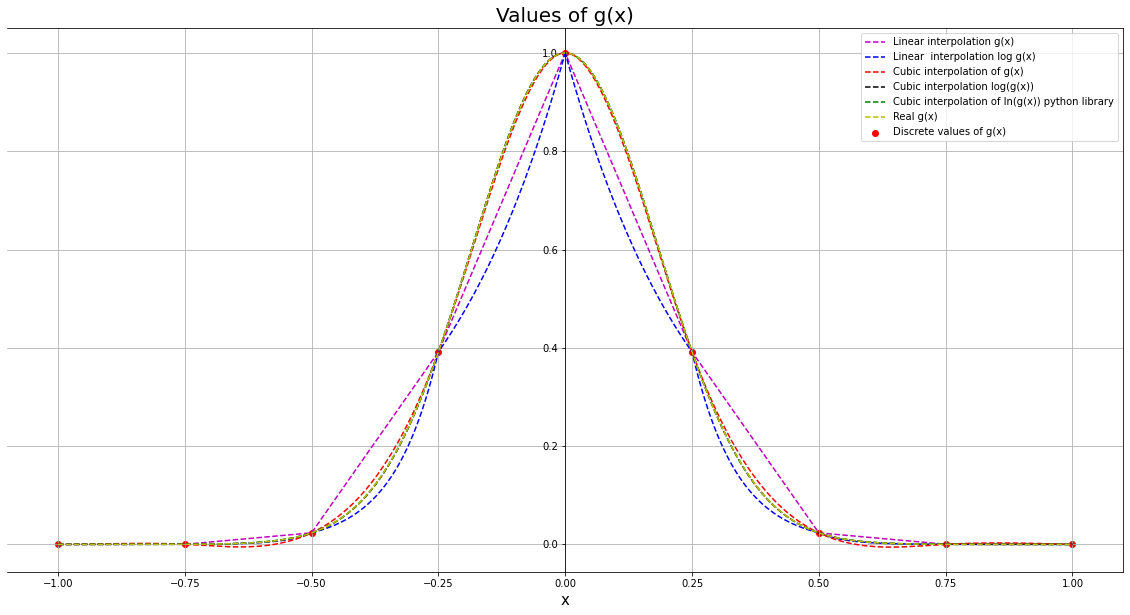

In [ ]:
data = {'y':[y_range, y_range_log, y_range_cubic, y_range_cubic_log, y_range_cs_log, real_g], 
        'title':["Linear interpolation g(x)","Linear  interpolation log g(x)",
                 "Cubic interpolation of g(x)", "Cubic interpolation log(g(x))",
                 "Cubic interpolation of ln(g(x)) python library", 
                 "Real g(x)"],
        'color':[ 'm', 'b', 'r', 'k', 'g','y']
        }
graph(data)
#Graph 4

In [ ]:
import pandas as pd
df = {'Method':["Linear interpolation g(x)","Linear  interpolation log g(x)",
                 "Cubic interpolation of g(x)", "Cubic interpolation log(g(x))",
                 "Cubic interpolation of g(x) python library"],
      'Error':[y_range_err, y_range_log_err, y_range_cubic_err, y_range_cubic_log_err, y_range_cs_log_err]}
df = pd.DataFrame(df)

##Conclusion

In this programming assignment, we have interpolated known values of $X$ with linear and cubic spline interpolations. You can see the rms error that we have achieved with each method:

In [ ]:
df

,Method,Error
0,Linear interpolation g(x),4.758444e-02
1,Linear interpolation log g(x),6.222703e-02
2,Cubic interpolation of g(x),6.142755e-03
3,Cubic interpolation log(g(x)),6.314425e-04
4,Cubic interpolation of g(x) python library,2.939716e-17


Before making an experiment, it was obvioius that cubic interpolation will approximate our function much better, since the data are non-linear. The interpolation with $ln(g), X$ was with smaller error since it is easier for cubic interpolation to approximate quadratic function and the result of the prediction will always be positive. If you look at the Graph #3, the results of cubic spline interpolation with different sets of data are almost the same except at some point interpolation with pure g(x) predicted negative results (the source of error, since our function is always positive).

The spline interpolation method can become a useful tool for data analysis since we can predict uknown intermediate data. This method is also much useful than just least-squares regression, because the process not always behave just like a simple polinomial function. For example, the speed and accelarition may variate over time. Then linear/quadratic/cubic splines can adapt to those changes and not only try fit it with one polinomial. 

With cubic spline interpolation I have achieved the minimum rms error of $\approx 6.3\cdot 10^{-4}$, but python library achieved error of $\approx 10^{-17}$. So, there can be some additional improvements in a way we generate cubic splines. Maybe there is a problem with calculating $M$ array with second derivatives. As you know, I have calculate using next formula:
$$M=A^{-1}d$$
But I also could do it with Thomas alghoritm, Gauss-Seidell methods or any other alghorithm (maybe from python library). So, in the future, I should study how approximation of $M$ could affect the rms error. Or there could be any other method for generating cubic splines that scipy library uses.

Links: \\
[1] Computational Physics Lecture 17, Interpolation. Retrieved from: https://www.youtube.com/watch?v=ZA5QAIjP_14&t=1101s \\
[2] Cubic Spline Interpolation. Retrieved from: http://fourier.eng.hmc.edu/e176/lectures/ch7/node6.html
